In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# İlk birkaç satırı inceleyelim
print(data.head())

# Eksik değerleri kontrol edelim
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Veri setini özellikler ve hedef değişken olarak ayırma
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes modeli oluşturma
nb = GaussianNB()

# Modeli eğitim verisi ile eğitme
nb.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred_nb = nb.predict(X_test)

# Sonuçları raporlama
print("Naive Bayes Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# ROC Curve
nb_prob = nb.predict_proba(X_test)[:,1]
roc_auc_nb = roc_auc_score(y_test, nb_prob)
print("ROC AUC Score:", roc_auc_nb)

Naive Bayes Classifier Results:
Confusion Matrix:
 [[138  19]
 [ 36  38]]
Accuracy: 0.7619047619047619
F1 Score: 0.5801526717557252
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

ROC AUC Score: 0.8039249440523325


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# K değerlerini belirleme
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# En iyi K değerini belirleme
best_k = k_values[np.argmax(k_scores)]
print("Best K value:", best_k)

# En iyi K değeri ile model oluşturma
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Sonuçları raporlama
print("K-NN Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC Curve
knn_prob = knn.predict_proba(X_test)[:,1]
roc_auc_knn = roc_auc_score(y_test, knn_prob)
print("ROC AUC Score:", roc_auc_knn)

Best K value: 11
K-NN Classifier Results:
Confusion Matrix:
 [[135  22]
 [ 35  39]]
Accuracy: 0.7532467532467533
F1 Score: 0.5777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231

ROC AUC Score: 0.7865381304871751


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# MLP Modeli
mlp = MLPClassifier(random_state=0, max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# ROC Curve
mlp_prob = mlp.predict_proba(X_test)[:,1]
roc_auc_mlp = roc_auc_score(y_test, mlp_prob)
print("ROC AUC Score:", roc_auc_mlp)

# SVM Modeli
svm = SVC(probability=True, random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# ROC Curve
svm_prob = svm.predict_proba(X_test)[:,1]
roc_auc_svm = roc_auc_score(y_test, svm_prob)
print("ROC AUC Score:", roc_auc_svm)

MLP Classifier Results:
Confusion Matrix:
 [[141  16]
 [ 56  18]]
Accuracy: 0.6883116883116883
F1 Score: 0.33333333333333337
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       157
           1       0.53      0.24      0.33        74

    accuracy                           0.69       231
   macro avg       0.62      0.57      0.56       231
weighted avg       0.66      0.69      0.65       231

ROC AUC Score: 0.6823033224307111
SVM Classifier Results:
Confusion Matrix:
 [[142  15]
 [ 42  32]]
Accuracy: 0.7532467532467533
F1 Score: 0.5289256198347106
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231

ROC AUC Score: 

         Model  Accuracy  F1 Score   ROC AUC
0  Naive Bayes  0.761905  0.580153  0.803925
1         K-NN  0.753247  0.577778  0.786538
2          MLP  0.688312  0.333333  0.682303
3          SVM  0.753247  0.528926  0.813996


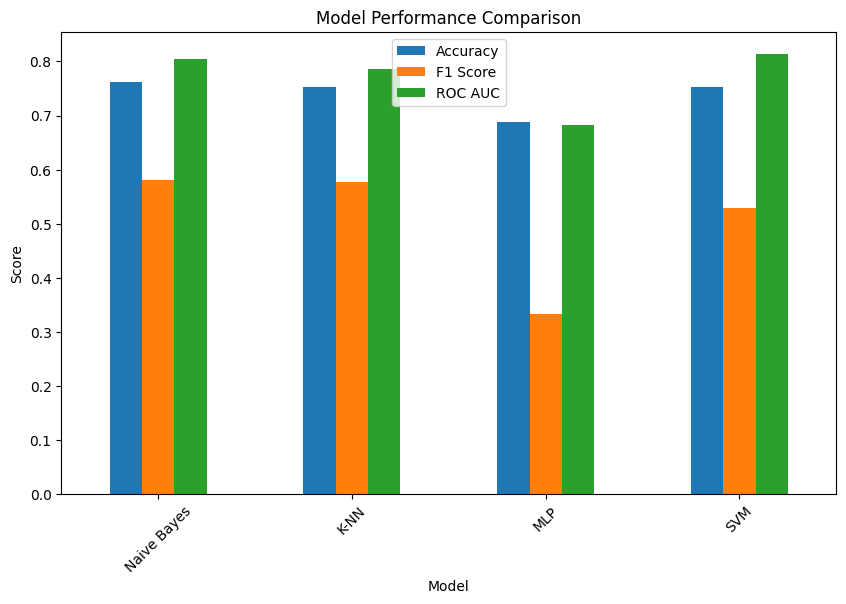

In [14]:
# Sonuçları DataFrame olarak toplama
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'K-NN', 'MLP', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_mlp), accuracy_score(y_test, y_pred_svm)],
    'F1 Score': [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_mlp), f1_score(y_test, y_pred_svm)],
    'ROC AUC': [roc_auc_nb, roc_auc_knn, roc_auc_mlp, roc_auc_svm]
})

print(results)

# Grafik çizimi
results.plot(x='Model', y=['Accuracy', 'F1 Score', 'ROC AUC'], kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()